# Machine Learning: Intro to Deep Learning (numpy only)

**Table of Contents**
1. [Perceptron](#an)
2. [Multi-Layer Perceptron (MLP)](#ann)
3. [Convolutional Networks](#cnn)
4. [Recurrent Networks](#rnn)

## 1. <a class="anchor" id="an">Perceptron</a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 1.1 Definition

The **Perceptron** is a binary classification model, introduced by [F. Rosemblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in the late 50's.

> The prediction function of the perceptron is 
$$
\mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = 
\begin{cases}
1 & \text{if } \langle \mathbf{x}, \mathbf{w} \rangle + b > 0, \\
0 & \text{otherwise}.
\end{cases}
$$

The following figure gives a representation of the Perceptron as an **Artificial Neuron**. 

<img src="images/perceptron.png" width="70%">

Notice that the **activation function** can be any *non-linear* function. Example of basic activation functions
- the **threshold** function (used by the standard Perceptron):
$$
    x \mapsto  \begin{cases}
        1 & \text{if } x > 0 \\
        0 & \text{otherwise}.
    \end{cases}
$$

- the **sigmoid** function (used by the Logistic Regression):
$$
 x \mapsto \frac{1}{1 + \exp(-x)},
$$

- the **tanh** (hyperbolic tangent) function:
$$
 x \mapsto \frac{\exp(2x) -1}{\exp(2x) + 1}.
$$

### 1.2 Perceptron learning rule

#### 1.2.1 Update Rule

For simplicity, let's change our inputs and add a $1$ in the first dimension, that is $\mathbf{x} = [1, x_1, \cdots, x_d]$ and $\mathbf{w} = [b, w_1, \cdots, w_d]$.

The Perceptron update rule of our parameter vector $\mathbf{w}$, for a training sample $(\mathbf{x}_i, y_i)$, is given by

$$
\mathbf{w} = \mathbf{w} + \eta  \big(y_i -  f(\mathbf{x}_i; \theta) \big)\mathbf{x}_i = 
\begin{cases}
        \mathbf{w}  & \text{if } y_i =  f(\mathbf{x}_i; \theta) \\
        \mathbf{w} + \eta \mathbf{x}_i & \text{if } y_i = 1 \text{ and } f(\mathbf{x}_i; \theta) = 0\\
        \mathbf{w} - \eta \mathbf{x}_i & \text{if } y_i = 0 \text{ and } f(\mathbf{x}_i; \theta) = 1\\
    \end{cases}
$$

where $\eta$ is the learning rate.
>Generaly, $\eta = 1$ for the Perceptron.

#### 1.2.2 Interpretation of the Update Rule

In the Perceptron update rule, notice that
- if $ y_i = 1 \text{ and } f(\mathbf{x}_i; \theta) = 0$, that is $\langle \mathbf{x}, \mathbf{w} \rangle < 0$ *i.e.* the $\cos(\angle (\mathbf{x}_i, \mathbf{w} )) < 0$, therefore we need to decrease the angle. And, by using the rule $\mathbf{w}_{new} = \mathbf{w} + \eta \mathbf{x}_i$, we get

$$\cos(\angle (\mathbf{x}_i, \mathbf{w}_{new} )) \sim \langle \mathbf{x}, \mathbf{w}_{new} \rangle = \langle \mathbf{x}_i, \mathbf{w} \rangle + \eta\langle \mathbf{x}_i, \mathbf{x}_i \rangle >  \langle \mathbf{x}_i, \mathbf{w} \rangle  \sim \cos(\angle (\mathbf{x}_i, \mathbf{w} )),  $$

- similarly if $ y_i = 0 \text{ and } f(\mathbf{x}_i; \theta) = 1$,   then $\cos(\angle (\mathbf{x}_i, \mathbf{w} )) > 0$, therefore we need to increase the angle. And, by using the rule $\mathbf{w}_{new} = \mathbf{w} - \eta \mathbf{x}_i$, we get 

$$\cos(\angle (\mathbf{x}_i, \mathbf{w}_{new} ))  \sim \langle \mathbf{x}, \mathbf{w}_{new} \rangle = \langle \mathbf{x}_i, \mathbf{w} \rangle - \eta\langle \mathbf{x}_i, \mathbf{x}_i \rangle <  \langle \mathbf{x}_i, \mathbf{w} \rangle  \sim \cos(\angle (\mathbf{x}_i, \mathbf{w} )).  $$


#### 1.2.3 Cost function

The cost function is defined as
$$
\mathcal{L}(\theta) = \frac{1}{2n} \sum_{i=1}^n \big(y_i - f(\mathbf{x}_i; \theta)\big)^2.
$$

### 1.3 Coding our Perceptron Model

#### 1.3.1 Designing the model

In [73]:
import numpy as np
class MyPerceptron:
    def __init__(self, n_iter, lr=1):
        self.n_iter = n_iter
        self.lr = lr
    
        self.losses = []
        self.grads = []
        
    def init_params(self, n_feats):
        self.w = np.zeros((1, n_feats))
        self.b = 0.
    
    def _optimize(self, X, y):
        m = X.shape[0]

        # cost function 
        preds = np.squeeze(self.activation(X))
        distances = np.squeeze(preds != y)
        cost = np.mean(distances)
        
        """
        # computing the rules (for loop version )
        dw = 0; db = 0
        for i in range(len(X)): 
            if distances[i]:
                if preds[i] == 0 and y[i] ==1:
                    dw += -(1/m)*X[i,:] 
                    db += -(1/m)
                elif preds[i] == 1 and y[i] ==0:
                    dw += (1/m)*X[i,:]
                    db += (1/m)
        """
        # computing the rules (vectorized version)
        dw = (1/m)*np.dot(preds - y, X)
        db = (1/m)*np.sum(preds - y)
        
        grads = {"dLdw": dw, "dLdb": db}

        return grads, cost

    def activation(self, X):  
        """
            Compute the Sigmoid activation on the dataset
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """          
        return np.dot(self.w, X.T) + self.b > 0
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
            y: (np-array) shape=( n_samples)
                targets 
        """
        
        self.init_params(X.shape[1])
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, y)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            #if (i % 10 == 0):
            #    print("Standard Perceptron: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Perceptron: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        return self.activation(X)
        
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        pred = self.predict(X)
        return (pred == y).mean()


#### 1.3.2 Testing the model

In [74]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

# we create 200 separable points
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=2, class_sep=2.0)

def print_decision(X, y, clf, title="Decision Boundary"):
    plt.figure()
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    ax.contourf(xx, yy, Z, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
    plt.title(title)

Standard Perceptron: Iter 99, Cost 0.0


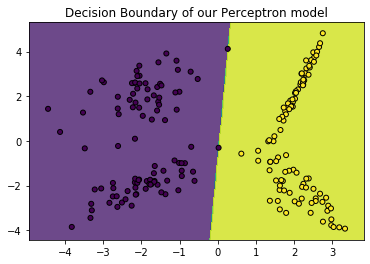

In [75]:
my_clf = MyPerceptron(n_iter=100, lr=1.)
my_clf.fit(X, y)
print_decision(X, y,  my_clf, "Decision Boundary of our Perceptron model")

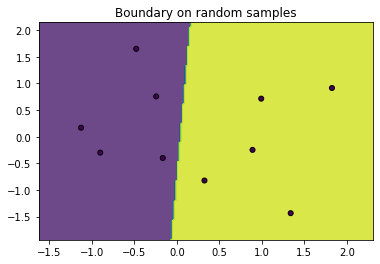

In [131]:
rand_points = np.random.randn(10, 2)
print_decision(rand_points, np.ones(10), my_clf, "Boundary on random samples")

## 2. <a class="anchor" id="ann" >Feed-Forward models</a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d,  y \in \mathbb{T})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.
- For classification tasks $\mathbb{T} = \{0, \cdots, C-1\}$, where $C$ is number of classes
- And, for regression tasks $\mathbb{T} = \mathbb{R}$

### 2.1. Definition


#### 2.1.1 Basic idea

We have seen the Artificial Neuron (the Perceptron), and now we need to connect it to other neurons.
> Just like in nature neurons are interconnected to each other to obtain a complex network.

In this section, we will use a **feed-forward** representation to create our network:
- the artificial neurons are packed in **layers**
- each layer contains a certain number of neurons that do not interact with each other
- layers are concatened hierarchically (a layer is connected to a previous and next one)
- a neuron in a layer takes as input all the outputs of the previous layer

This representation is known as the **multi-layer perceptron (MLP)** or simple the **artificial neural network (ANN)**.

The figure below illustrates a basic MLP (with 2 layers).

<img src="images/ann0.png" width="70%">

#### 2.1.2 Formal definition

A feed-forward neural network $f(\cdot; \theta)$ is a **directed acyclic graph**, parametrized by $\theta$, 
that 
- applies a series of transformation to an input $\mathbf{x} \in \mathbb{R}^d$, layer-wise, 
- without recursion, 

to produce an output $\mathbf{y} = f(\mathbf{x}, \theta) \in \mathbb{R}^C$ , as depicted in below.


<img src="images/layer_wise_fnn.png" width="60%" />

Given a $K$ layer network -- here the input is not considered as a layer --, the $k$-th layer is characterized by a function
$f_k$ parametrized by $\theta_k$. 
In other words, 
> $f(\mathbf{x}, \theta) = f_K(\dots f_2(f_1(\mathbf{x}; \theta_1); \theta_2) \dots; \theta_K), \quad \forall \mathbf{x} \in \mathcal{I}$.

The $f_k$'s are of the form 
> $
 f_k(\mathbf{z}_{k-1}; \theta_k) = \mathbf{z}_k = \sigma_k(\mathbf{q}_{k-1}) = \sigma_k(\mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k),
$

where 
- $\theta_k = \{\mathbf{W}_k, \mathbf{b}_k\}$,
- $\mathbf{W}_k \in \mathbb{R}^{h_k\times h_{k-1}}$ is known as the **weight matrix**, 
- $\mathbf{b}_k \in \mathbb{R}^{h_k}$ is the **bias vector**, 
- $\mathbf{z}_k \in \mathbb{R}^{h_k}$ is the output of the $k$-th layer, 
- $h_k$ is the dimension (the number of neurons) of the $k$-th layer, 
- $\sigma_k$ is a point-wise operator known as **activation function** of the layer, 
- and $\mathbf{q}_k$ is the **pre-activation vector**.

The figure below gives another illustration on the interaction between two layers.

<img src="images/ann1.png" width="60%">

In the previous section, we have seen three activation functions. 
Here are additional examples used in ANN:  
- **softmax**:  $\mathbf{t} \in \mathbb{R}^C  \mapsto [\dots, \frac{\exp(\mathbf{x}[i])}{\sum_{j=1}^C \exp(\mathbf{x}[j])}, \dots]$,
- **ReLU**:  $x \mapsto \max(0,x)$ (The Rectified Linear Unit ), 
- **PReLU**:  $x \mapsto \max(0,x) + a \min(0, x)$ (Parametric ReLU, with parameter $a$),
- **ELU**:  $x \mapsto \max(0,x) + a \min(0, \exp(x) -1)$ (Exponential Linear Unit, with parameter $a$).

> Note that, 
- differentiables activations (sigmoid, softmax, tanh) are prefered on an output layer,
- *linear unit* based are prefered on hidden layers.

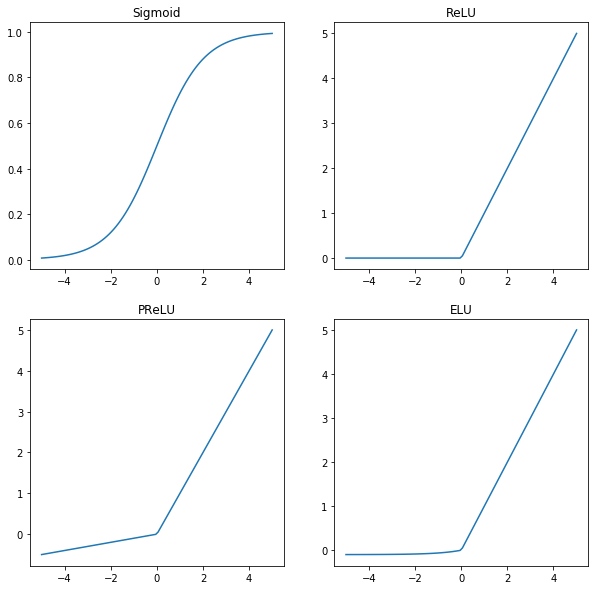

In [27]:
import numpy as np
import pylab as plt

sigmoid = lambda t : 1./(1. + np.exp(-t))
tanh = lambda t : (np.exp(2*t) - 1.)/(np.exp(2*t) + 1. )
relu = lambda t : np.maximum(0, t)
prelu = lambda t, a : np.maximum(0, t) + a *np.minimum(0, t)
elu = lambda t, a : np.maximum(0, t) + a * np.minimum(0, np.exp(t) -1)

xs = np.linspace(-5, 5, 100)

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(xs, sigmoid(xs))
plt.title('Sigmoid')

plt.subplot(222)
plt.plot(xs, relu(xs))
plt.title('ReLU')

plt.subplot(223)
plt.plot(xs, prelu(xs, 0.1))
plt.title('PReLU')

plt.subplot(224)
plt.plot(xs, elu(xs, 0.1))
plt.title('ELU')

plt.show()

#### 2.1.3 Example

Illustration of a complete ANN which 
- takes $9$-dimensional vectors as inputs,
- has $2$ hidden layers: the first layer has $4$ neurons, and the second has $2$,
- outputs a single real number.

>This architecture can be used, on $9$-dimensional, for
- classification into two class,
- regression.

<img src="images/ann2.png" width="60%">

### 2.2. Loss function

Various loss functions are used to train ANNs.
Depending on the tasks, a certain may be prefered to others.

> In this subsection, we will use an ANN of $K$ layers. 

#### 2.2.1 Euclidian loss

The Euclidian loss can be used for almost any task (classification and regression).

> The Euclidian loss averages the **Euclidian distances** ($\ell_2$-norms) between targets and predictions.  $\mathcal{L}$ is 
$$
\mathcal{L}(\theta) = \frac{1}{2n} \sum_{i=1}^n \|\mathbf{y}_i - f(\mathbf{x}_i; \theta)\|_2^2 =  \frac{1}{2n} \|\mathbf{Y} - f(\mathbf{X}; \theta)\|_F^2,
$$
where $\mathbf{Y} = [\mathbf{y}_1, \cdots, \mathbf{y}_n]$, $\mathbf{X} = [\mathbf{x}_1, \cdots, \mathbf{x}_n]$, and $f(\mathbf{X}; \theta) = [f(\mathbf{x}_1; \theta), \cdots, f(\mathbf{x}_n; \theta)]$.

> The gradients of $\mathcal{L}$ w.r.t the $c$-th weight vector of the last layer, $ \mathbf{W}_K[c, \cdot] = \mathbf{w}_K^{(c)}$, are
$$
\nabla_{\mathbf{w}_K^{(c)}} \mathcal{L} (\theta) = -\frac{1}{n} \sum_{i=1}^n \big(\mathbf{y}_i -  f(\mathbf{x}_i; \theta) \big) \nabla_{\mathbf{w}_K^{(c)}} f(\mathbf{x}_i; \theta).
$$ 

#### 2.2.2 Cross-Entropy (Negative Log-likelihood)

The cross-entropy assumes that
- the targets are binary $\{0, 1\}$,
- the activation of the final layer is a Sigmoid.

The complete derivation of the negative log-likelihood is given in the *Binary Logistic Regression* section of the [previous lecture](Lect_02.ipynb#blr-loss).

> The cross-entropy loss, $\mathcal{L}$, is defined as 
$$
\mathcal{L}(\theta) = - \frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)).
$$

#### 2.2.3 Softmax Loss

The softmax loss assumes that
- the targets belongs to $\{0, C-1\}$, where $C$ is the number of classes,
- the activation of the final layer is a Softmax,
- $f(\mathbf{x}; \theta) \in \mathbb{R}^C$, where $f(\mathbf{x}; \theta)[k]$ is the probability of belonging to the $k$-th class.

The complete derivation of the Softmax loss (*a.k.a* the multinomial logistic regression loss) is given in the *Multiclass Logistic Regression* section of the [previous lecture](Lect_02.ipynb#blr-loss).

> The Softmax loss, $\mathcal{L}$, is defined as 
$$ \mathcal{L}(\theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log f(\mathbf{x}; \theta) [k].$$

### 2.2 Back-propagation

### 2.3. Improving the Gradient Descent algorithm

### 2.4 Example 

## 3. <a class="anchor" id="cnn">Convolutional Models</a>

## 4. Recurrent Models